# chapte r9

In [ ]:
swim = read.table('swim.dat', header = FALSE)

In [ ]:
swim = t(swim)
swim

V1,23.1,23.2,22.7,23.7
V2,23.2,23.1,22.6,23.6
V3,22.9,23.4,22.8,23.7
V4,22.9,23.5,22.8,23.5
V5,22.8,23.5,22.9,23.5
V6,22.7,23.4,22.8,23.4


In [ ]:
colnames(swim)

NULL

In [ ]:
swim$week = seq(from = 1, to = 11, by = 2)
swim

Warning message in swim$week = seq(from = 1, to = 11, by = 2):
“Coercing LHS to a list”


[[1]]
[1] 23.1

[[2]]
[1] 23.2

[[3]]
[1] 22.9

[[4]]
[1] 22.9

[[5]]
[1] 22.8

[[6]]
[1] 22.7

[[7]]
[1] 23.2

[[8]]
[1] 23.1

[[9]]
[1] 23.4

[[10]]
[1] 23.5

[[11]]
[1] 23.5

[[12]]
[1] 23.4

[[13]]
[1] 22.7

[[14]]
[1] 22.6

[[15]]
[1] 22.8

[[16]]
[1] 22.8

[[17]]
[1] 22.9

[[18]]
[1] 22.8

[[19]]
[1] 23.7

[[20]]
[1] 23.6

[[21]]
[1] 23.7

[[22]]
[1] 23.5

[[23]]
[1] 23.5

[[24]]
[1] 23.4

$week
[1]  1  3  5  7  9 11

In [ ]:
mod = glm(week~., data = swim)
summary(mod)

ERROR: ignored

In [ ]:
theta <- rgamma(1000,238)/10 
y1986 = rpois(1000, theta)
print (sort(y1986)[c(25,976)])

[1] 14 35


In [ ]:
theta <- rgamma(1000, 238, 10) 
y1986 = rpois(1000, theta)
print (sort(y1986)[c(25,976)])

[1] 15 35


In [ ]:
theta <- rgamma(1000, 238, 10) 
y1986 = rpois(1000, theta)
print (sort(y1986)[c(25,976)])

[1] 14 34


In [ ]:
pgamma(0.975, 1)/2

[1] 0.3114038

# chapter 10


## 10.2 (first attempt)

In [ ]:
install.packages('mcmc')
library(mcmc)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages('mvtnorm')
library(mvtnorm)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# install.packages('arm')
# library(arm)

In [ ]:
sparrow = read.table('msparrownest.dat', header = FALSE)
names(sparrow) = c('y', 'x')
head(sparrow)

,y,x
,<int>,<dbl>
1,0,13.03
2,1,13.69
3,1,12.62
4,0,11.70
5,0,12.39
6,0,12.44


In [ ]:
sims = 1e2

y = sparrow$y
x = sparrow$x

n = length(y)

r_all = rep(0, sims)
accept = rep(0, sims)

theta = matrix(0, nrow = sims, ncol = 2)
theta[1,] = 1e-1

In [ ]:
jumping = function(theta, scale) {
  rmvnorm(1, mean = theta, sigma = scale*diag(2))
}

invlogit_neel = function(eta) {
    exp(eta)/(1 + exp(eta))
}

posterior = function(arg1) {
  alpha = arg1[1]
  beta = arg1[2]
  post = 1
  for (i in 1:length(y)) {
    post = post * invlogit_neel(alpha + beta *x[i])^(y[i]) * (1 - invlogit_neel(alpha + beta*x[i]))^(1 - y[i])
    cat('post is ', post, '\n')
    cat('invlogit_neel(alpha + beta*x[i]) is ', invlogit_neel(alpha + beta*x[i]), '\n')
    cat('(1 - invlogit_neel(alpha + beta*x[i]))^(n[i] - y[i]) is ', (1 - invlogit_neel(alpha + beta*x[i]))^(n[i] - y[i]), '\n')
    cat('invlogit_neel(alpha + beta *x[i])^(y[i]) is ', invlogit_neel(alpha + beta *x[i])^(y[i]), '\n')

  }
  cat('post is ', post, '\n')
  post
}

for (i in 2:sims) {

  theta_star = jumping(theta[i-1,], 0.1)

  cat('theta_star is ', theta_star, '\n')

  r = min(
          exp(log(posterior(theta_star))) - exp(log(posterior(theta[i-1,]))), 
          1
          )

  r_all[i] = r

  cat('r is ', r, '\n')

  if (r < runif(1)) {
    theta[i,] = theta_star
    accept[i] = 1
  } else {
    theta[i,] = theta[i-1,]
  }
}


theta_star is  0.1368962 -0.1308106 
post is  0.8274364 
invlogit_neel(alpha + beta*x[i]) is  0.1725636 
(1 - invlogit_neel(alpha + beta*x[i]))^(n[i] - y[i]) is  0.0002901276 
invlogit_neel(alpha + beta *x[i])^(y[i]) is  1 
post is  0.1328717 
invlogit_neel(alpha + beta*x[i]) is  0.1605823 
(1 - invlogit_neel(alpha + beta*x[i]))^(n[i] - y[i]) is  NA 
invlogit_neel(alpha + beta *x[i])^(y[i]) is  0.1605823 
post is  0.02396427 
invlogit_neel(alpha + beta*x[i]) is  0.1803565 
(1 - invlogit_neel(alpha + beta*x[i]))^(n[i] - y[i]) is  NA 
invlogit_neel(alpha + beta *x[i])^(y[i]) is  0.1803565 
post is  0.01919932 
invlogit_neel(alpha + beta*x[i]) is  0.1988355 
(1 - invlogit_neel(alpha + beta*x[i]))^(n[i] - y[i]) is  NA 
invlogit_neel(alpha + beta *x[i])^(y[i]) is  1 
post is  0.01565039 
invlogit_neel(alpha + beta*x[i]) is  0.184847 
(1 - invlogit_neel(alpha + beta*x[i]))^(n[i] - y[i]) is  NA 
invlogit_neel(alpha + beta *x[i])^(y[i]) is  1 
post is  0.01277285 
invlogit_neel(alpha + beta*x[

In [ ]:
sum(accept)/sims # acceptance ratio

[1] 0.99

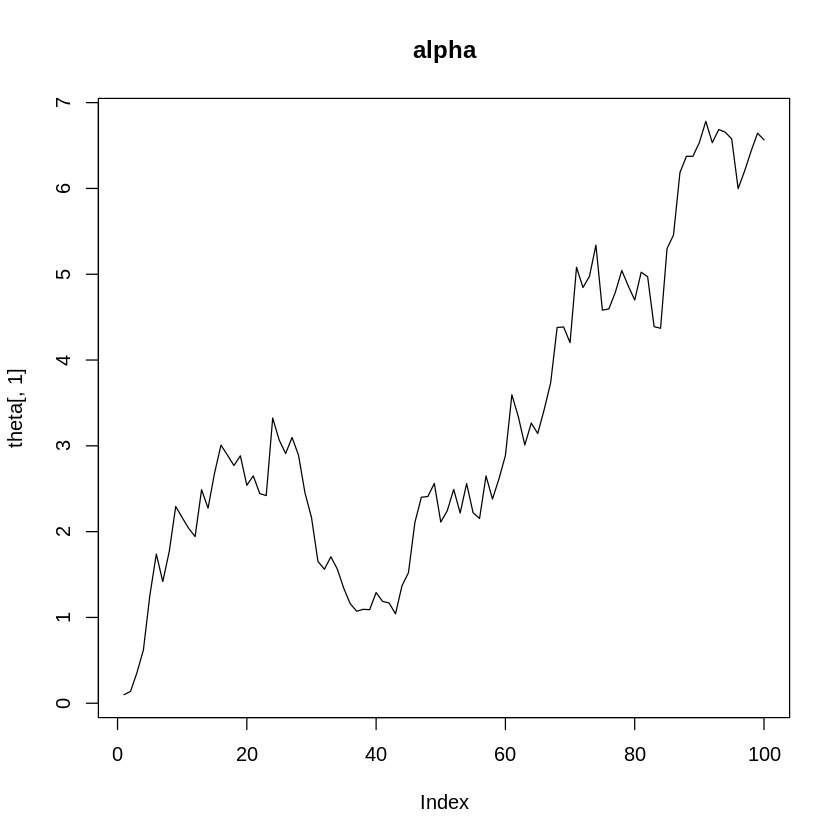

In [ ]:
plot(theta[,1], main = 'alpha', type = 'l')

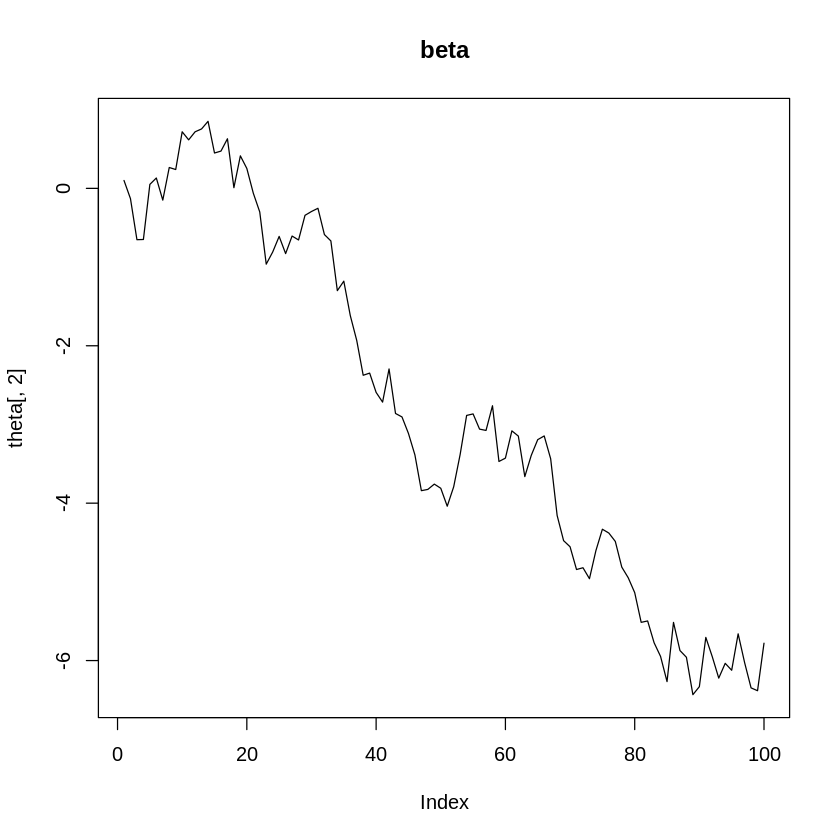

In [ ]:
plot(theta[,2], main = 'beta', type = 'l')

## 10.2 (2nd attempt)

In [ ]:
install.packages('mcmc')
library(mcmc)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
head(sparrow)

,y,x
,<int>,<dbl>
1,0,13.03
2,1,13.69
3,1,12.62
4,0,11.70
5,0,12.39
6,0,12.44


In [ ]:
msparrownest = sparrow

In [ ]:
mod = glm(sparrow$y ~ sparrow$x, data = sparrow, family = binomial, x = T)
summary(mod)


Call:
glm(formula = sparrow$y ~ sparrow$x, family = binomial, data = sparrow, 
    x = T)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-2.134  -1.107   0.619   1.009   1.616  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  -9.7868     4.6202  -2.118   0.0342 *
sparrow$x     0.7758     0.3578   2.168   0.0302 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 59.028  on 42  degrees of freedom
Residual deviance: 53.376  on 41  degrees of freedom
AIC: 57.376

Number of Fisher Scoring iterations: 4


In [ ]:
theta.init = as.numeric(coefficients(mod))
theta.init

[1] -9.7868100  0.7757703

In [ ]:
lupost_factory = function(x, y) function(theta) {

  # log likelihood + log prior
  exp_term = exp(x %*% theta)
  p = exp_term / (1 + exp_term)
  ll = sum(dbinom(y, 1, p, log = TRUE))

  prior = prior.theta(theta)
  ll+prior
}

pmn.theta = c(0, 0)
psd.theta = sqrt(c(25, 0.25))

prior.theta = function(theta) {
  sum(dnorm(theta, pmn.theta, psd.theta, log = TRUE))
}

lupost = lupost_factory(mod$x, mod$y)

[1] 0.28877

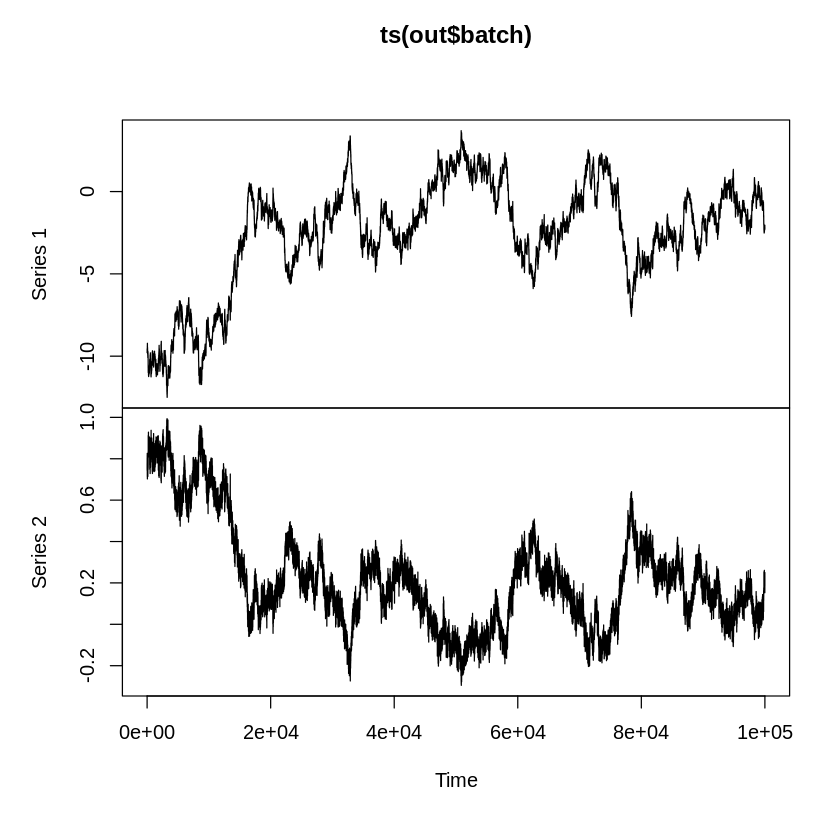

In [ ]:
set.seed(42)
out = metrop(lupost, theta.init, 1e5, scale = 1e-1)
plot(ts(out$batch))
out$accept

In [ ]:
out$final

[1] -2.1754559  0.1864221

[1] 0.24414

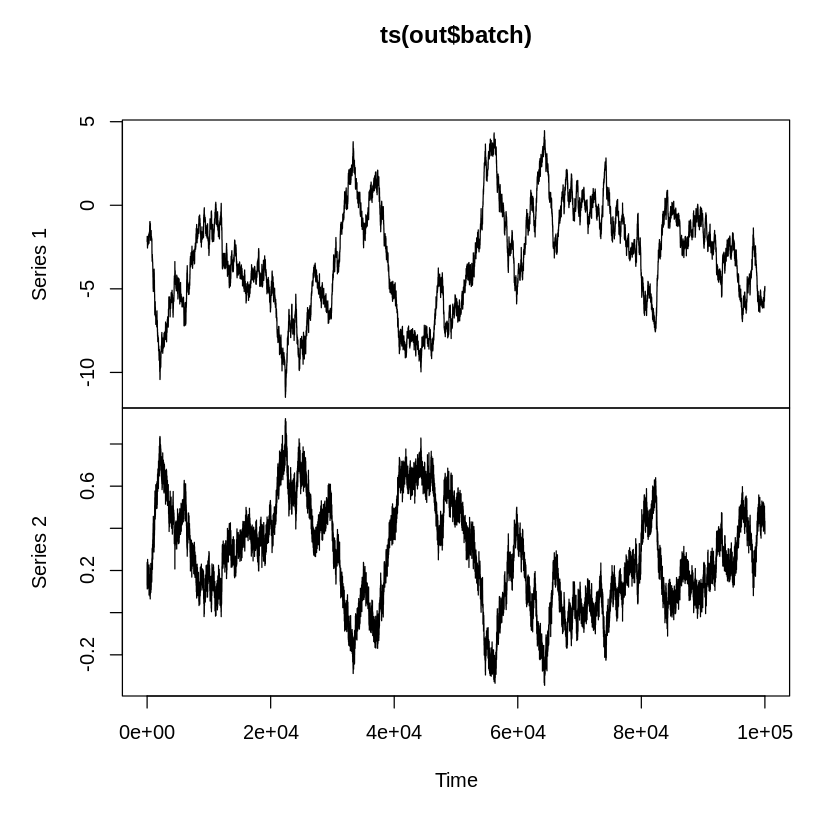

In [ ]:
out = metrop(out, scale = 1.2e-1)
plot(ts(out$batch))
out$accept

In [ ]:
out$final

[1] -4.8834818  0.3737166

## 10.2 (actual answer)

In [ ]:
msparrownest = sparrow

In [ ]:
library(MASS)
inv = solve
# In this sampling scheme, when we sample, we keep the values together
# ($\theta$)_ But when I store the values, I split them (alpha, beta)_
S = 10000
burn_in = 5000
y = msparrownest[, 1]
n = length(y)
# Use linear regression format, where column 1 is 1 (for alpha) and column 2 is
# the wingspan
x = cbind(rep(1, n), msparrownest[, 2])

# Start with X^T X but increase until acceptance ratio between 30% - 50%
var_prop = 7 * inv(t(x) %*% x)

# Prior parameters
pmn_theta = c(0, 0)
psd_theta = sqrt(c(25, 0.25))

# Where to store values
alpha = numeric(S + burn_in)
beta = numeric(S + burn_in)
# Acceptances
acs = 0

# Initial estimates
theta = c(0, 0)

# For calculating likelihood ratio
log_p_y = function(x, y, theta) {
  exp_term = exp(x %*% theta)
  p = exp_term / (1 + exp_term)
  sum(dbinom(y, 1, p, log = TRUE))
}

p_theta = function(theta) {
  sum(dnorm(theta, pmn_theta, psd_theta, log = TRUE))
}

for (s in 1:(S + burn_in)) {
  theta_star = mvrnorm(1, theta, var_prop)

  lhr = log_p_y(x, y, theta_star) +
    p_theta(theta_star) -
    log_p_y(x, y, theta) -
    p_theta(theta)

  if (log(runif(1)) < lhr) {
    theta = theta_star
    if (s > burn_in) {
      acs = acs + 1
    }
  }
  alpha[s] = theta[1]
  beta[s] = theta[2]
}
alpha = alpha[burn_in:length(alpha)]
beta = beta[burn_in:length(beta)]

message("Acceptance ratio: ", acs / S) # Good to go
mean(alpha)
mean(beta)

Acceptance ratio: 0.3896



[1] -4.673457

[1] 0.3813273

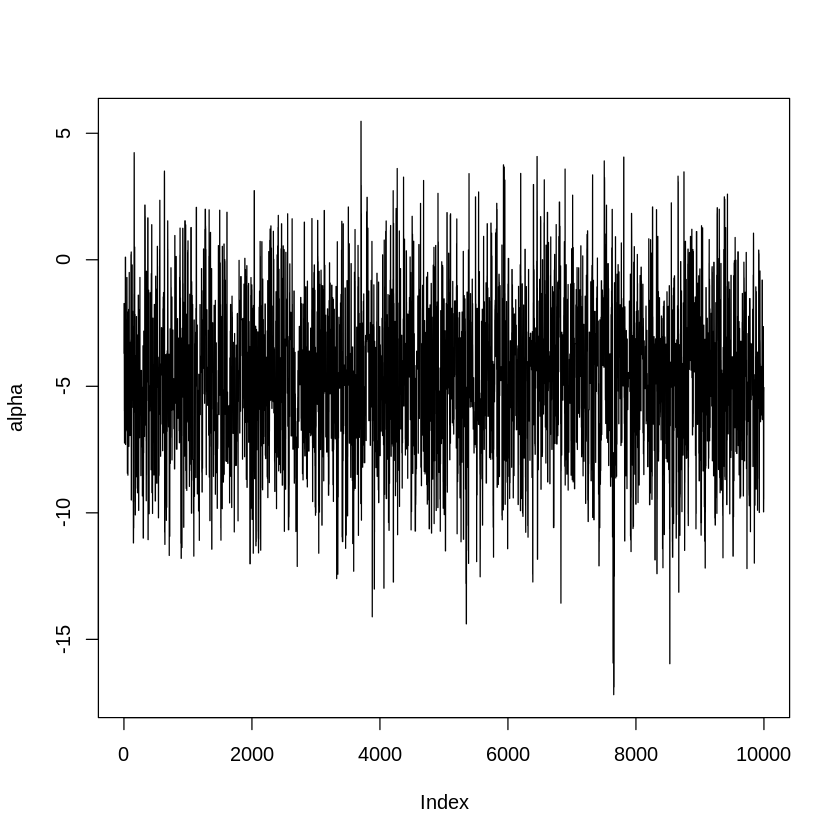

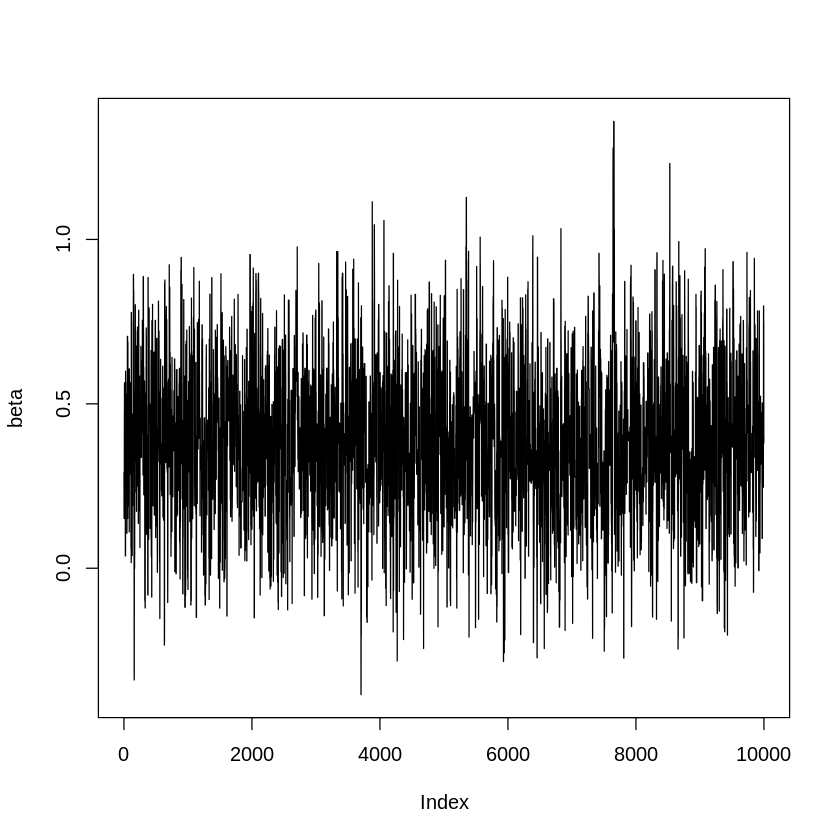

In [ ]:
plot(alpha, type = 'l')
plot(beta, type = 'l')

# chapter 5

In [ ]:
school1 = scan('http://www2.stat.duke.edu/~pdh10/FCBS/Exercises/school1.dat')
school2 = scan('http://www2.stat.duke.edu/~pdh10/FCBS/Exercises/school2.dat')
school3 = scan('http://www2.stat.duke.edu/~pdh10/FCBS/Exercises/school3.dat')

In [ ]:
head(school1)

In [ ]:
# question 5.2

S = 1e6

n_a = 16
n_b = 16

y_bar_a = 75.2
y_bar_b = 77.5

s_a = 7.3
s_b = 8.1

b_a = 75
c_a = 1/100
tau_a = 1/s_a^2

b_b = 75
c_b = 1/100
tau_b = 1/s_b^2

theta = rnorm(S, b_a, c_a^-1)
post_a = rnorm(S, (c_a*b_a+n_a*tau_a*y_bar_a/(c_a+n_a*tau_a)), 1/(c_a+n_a*tau_a))
post_b = rnorm(S, (c_b*b_b+n_b*tau_b*y_bar_b/(c_b+n_b*tau_b)), 1/(c_b+n_b*tau_b))


mean(post_a<post_b)

# chapter 6

In [ ]:
theta = gamma = c()

ya = c(12,9,12,14,13,13,15,8,15,6)
yb = c(11,11,10,9,9,8,7,10,6,8,8,9,7)

n_a = length(ya)
n_b = length(yb)

a_theta = 2
b_theta = 1

a_gammas = c(8,16,32,64,128)

S = 5e3

means = NULL

theta[1] = gamma[1] = 1
for (i in 1:length(a_gammas)) {

  a_gamma = a_gammas[i]
  b_gamma = a_gamma

  for (iter in 2:S) {

    theta[iter] = rgamma(1, sum(ya) + sum(yb) + a_theta, n_a + b_theta + n_b*gamma[iter - 1])
    gamma[iter] = rgamma(1, sum(yb) + a_gamma, n_b * theta[iter - 1] + b_gamma)

  }

  plot(theta, type = 'l', main = as.character(b_gamma))
  plot(gamma, type = 'l', main = as.character(b_gamma))

  theta_a = theta
  theta_b = theta*gamma
  means = c(means, mean((theta_a - theta_b)))
  cat('means ', mean((theta_a - theta_b)), '\n')
  
}


In [ ]:
plot(a_gammas, means, type = 'l')

In [ ]:
N = 1e6
n = 10

x_bar = 2

theta= rnorm(N, 1, 1)

f = function(theta) {
  exp(-(x_bar -theta)^2/(2*n^-1))/sqrt(2*pi*n^-1)
}

m0 = f(0)
m1 = mean(f(theta))
m0/m1
log(m0/m1)

## 10.2 (third attempt)

In [ ]:
head(sparrow)

,y,x
,<int>,<dbl>
1,0,13.03
2,1,13.69
3,1,12.62
4,0,11.70
5,0,12.39
6,0,12.44


In [ ]:
mod1 = glm(sparrow$y~sparrow$x, data = sparrow, family = binomial(), x = T)
summary(mod1)


Call:
glm(formula = sparrow$y ~ sparrow$x, family = binomial(), data = sparrow, 
    x = T)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-2.134  -1.107   0.619   1.009   1.616  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  -9.7868     4.6202  -2.118   0.0342 *
sparrow$x     0.7758     0.3578   2.168   0.0302 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 59.028  on 42  degrees of freedom
Residual deviance: 53.376  on 41  degrees of freedom
AIC: 57.376

Number of Fisher Scoring iterations: 4


In [ ]:
x = mod1$x
y = mod1$y
n = length(y)

In [ ]:
alpha_init = mod1$coefficients[1]
beta_init = mod1$coefficients[2]
alpha_init
beta_init

(Intercept) 
   -9.78681

sparrow$x 
0.7757703

In [ ]:
invlogit = function(x) {
  exp(x)/(1+exp(x))
}

lu_post_factory = function(x, y) function(alpha_beta_combined) {
  
  alpha = alpha_beta_combined[1]
  beta = alpha_beta_combined[2]

  first = log(choose(n,y) * invlogit(alpha + beta*x)^y * (1-invlogit(alpha + beta*x))^(n-y))
  first = sum(first)

  second = log(prior_alpha(alpha_beta_combined))
  third = log(prior_beta(alpha_beta_combined))
  first + second + third

}

prior_alpha = function(theta) {
  rbeta(1, 1, 2)
  # sum(dnorm(theta, pmn.theta[1], psd.theta[1]))
}

prior_beta = function(theta) {
  rbeta(1, 2, 4)
  # sum(dnorm(theta, pmn.theta[2], psd.theta[2]))
}

lupost = lu_post_factory(mod1$x,mod1$y)

set.seed(42)
out = metrop(lupost, initial = c(alpha_init, beta_init), nbatch = 1e4)

In [ ]:
names(out)

[1] "accept"       "batch"        "initial"      "final"        "accept.batch"
 [6] "initial.seed" "final.seed"   "time"         "lud"          "nbatch"      
[11] "blen"         "nspac"        "scale"        "debug"

(Intercept)   sparrow$x 
-4.74350345  0.03952635 
[1] 0.0049


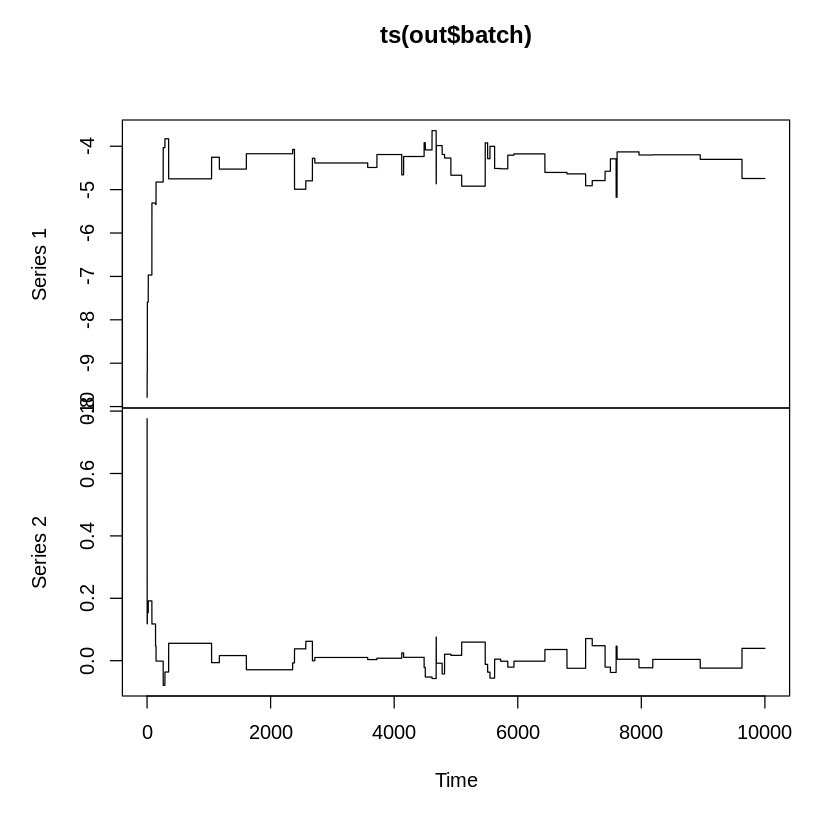

In [ ]:
helper = function(out) {
  print(out$final)
  print(out$accept)
  plot(ts(out$batch))
}

helper(out)

(Intercept)   sparrow$x 
-4.98216775  0.05053189 
[1] 0.1197


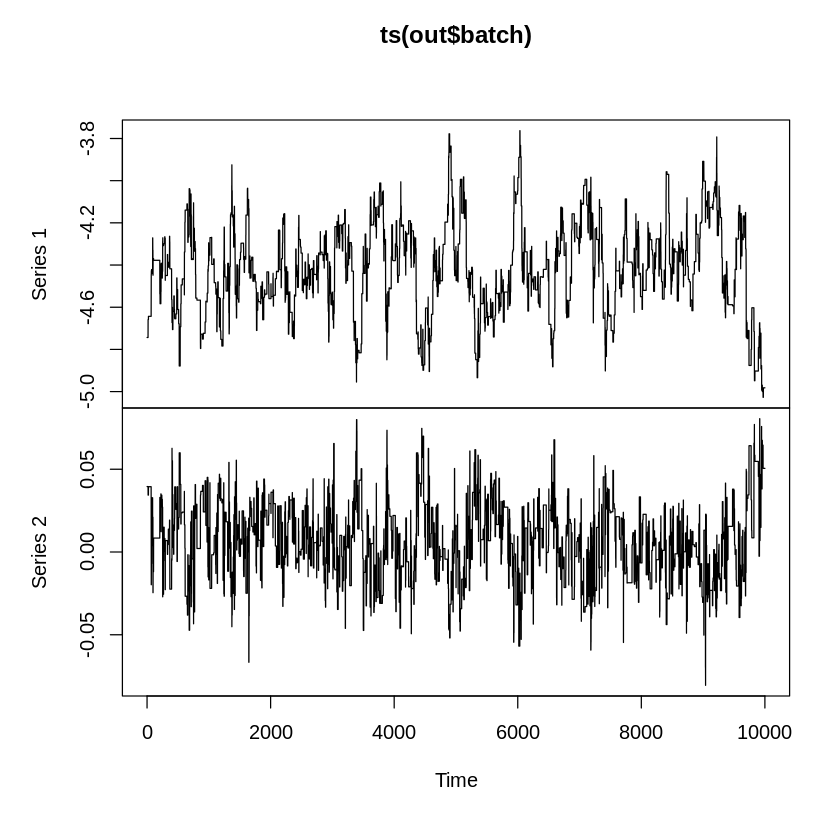

In [ ]:
scale = 1e-1
out = metrop(out, scale = scale)
helper(out)

 (Intercept)    sparrow$x 
-4.301363899  0.001857845 
[1] 0.1289


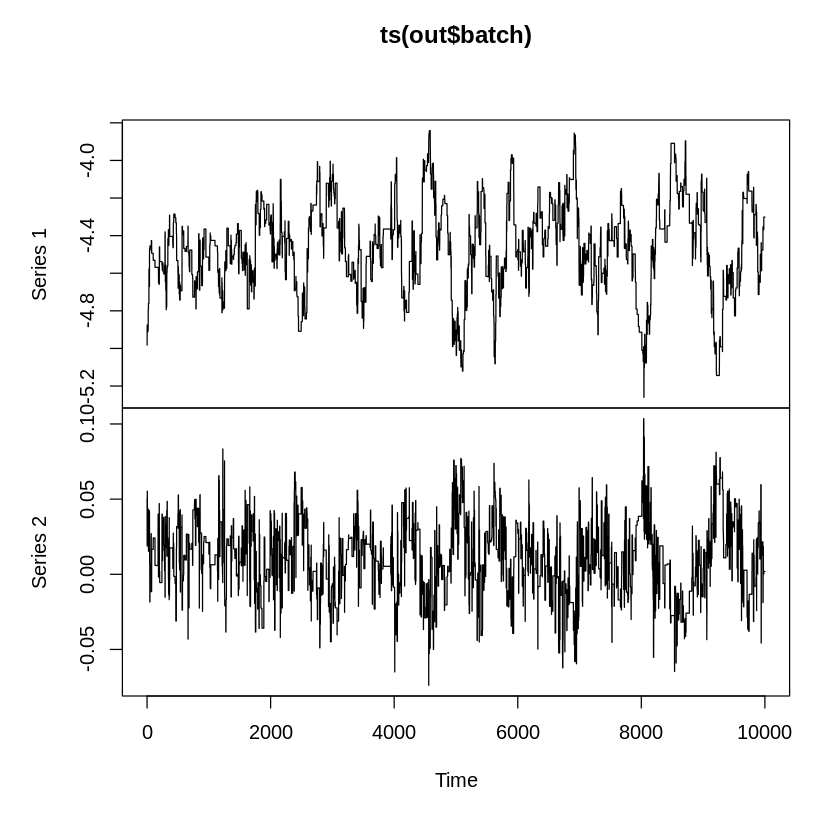

In [ ]:
out = metrop(out, scale = scale*0.9)
helper(out)

(Intercept)   sparrow$x 
-4.21628552 -0.02758007 
[1] 0.1906


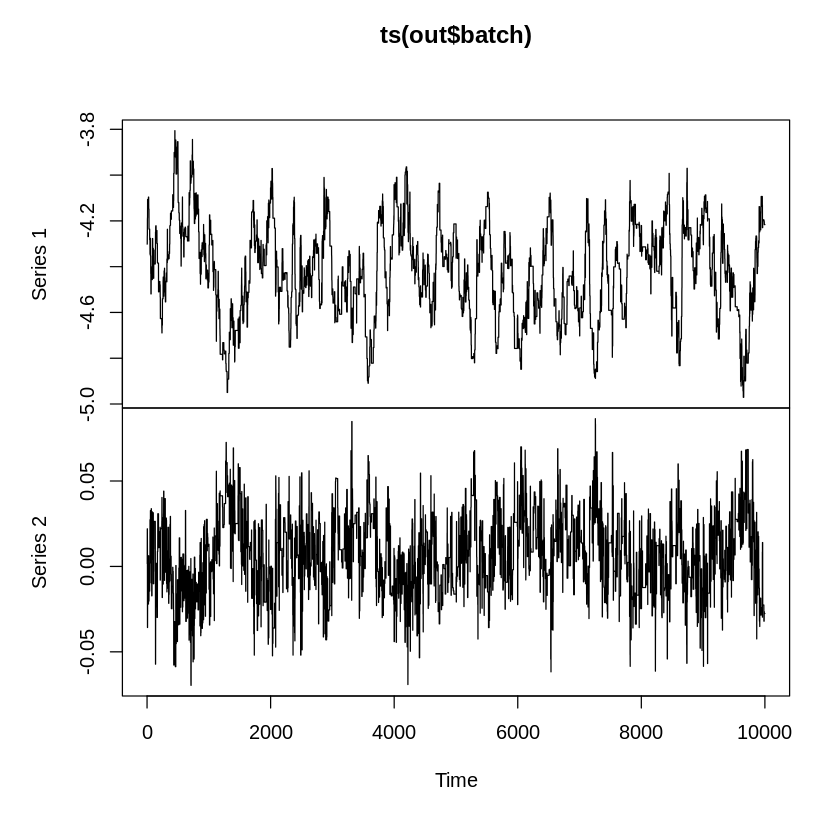

In [ ]:
out = metrop(out, scale = scale*0.6)
helper(out) 

(Intercept)   sparrow$x 
-4.54583846  0.01224607 
[1] 0.2234


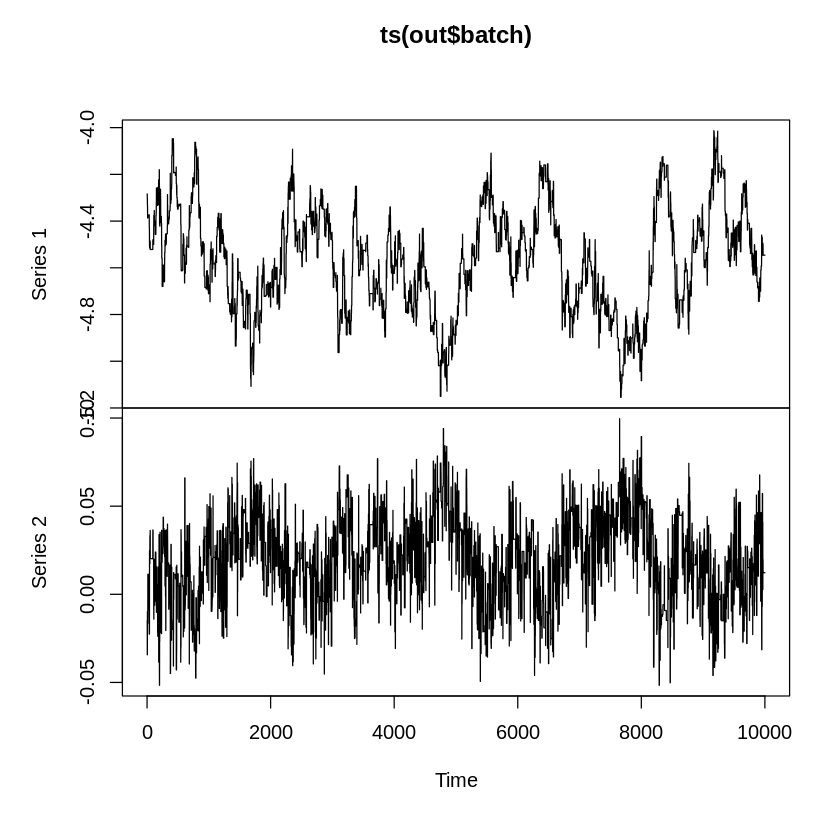

In [ ]:
out = metrop(out, scale = scale*0.5)
helper(out)

(Intercept)   sparrow$x 
-4.88163104  0.06312159 
[1] 0.2593


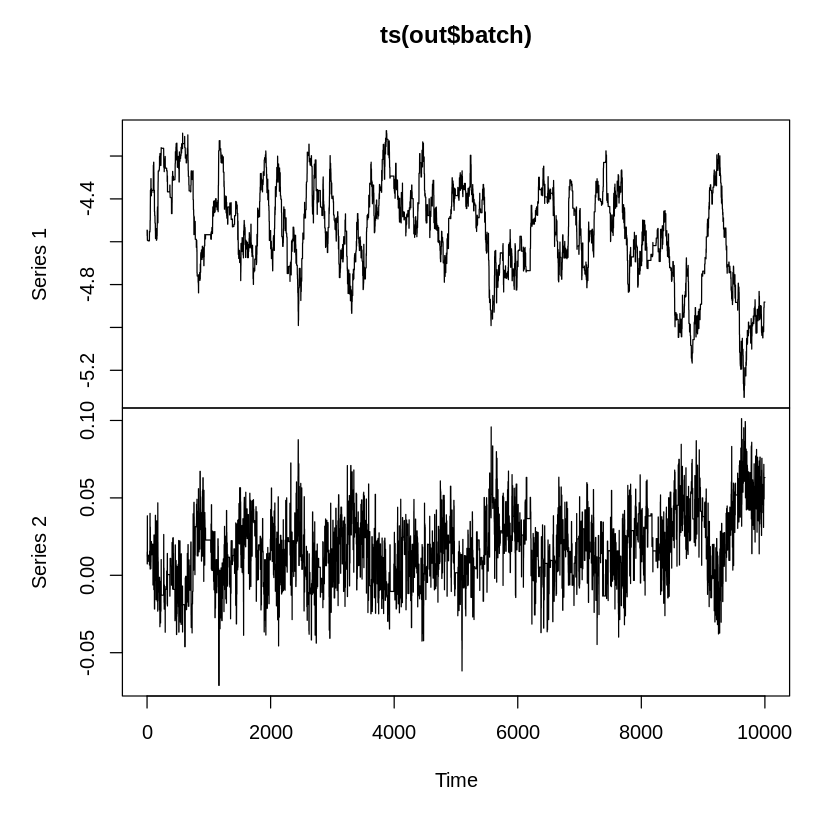

In [ ]:
out = metrop(out, scale = scale*0.4)
helper(out)

alpha = -4.82454413

beta = 0.04076436

## 10.2 (fourth attempt - MH)

In [ ]:
head(sparrow)
x = sparrow$x
y = sparrow$y
n = length(y)

,y,x
,<int>,<dbl>
1,0,13.03
2,1,13.69
3,1,12.62
4,0,11.70
5,0,12.39
6,0,12.44


In [ ]:
theta = alpha = beta = c()

# 8:56 - > 9:06

alpha[1] = beta[1] = 1
theta[1] = 0.5

S = 1e5

invlogit = function(x) {
  exp(x)/(1+exp(x))
}

lu_post_factory = function(x, y) function(alpha_beta_combined) {
  
  alpha = alpha_beta_combined[1]
  beta = alpha_beta_combined[2]

  first = log(choose(n,y) * invlogit(alpha + beta*x)^y * (1-invlogit(alpha + beta*x))^(n-y))
  first = sum(first) 

  second = log(prior_alpha())
  third = log(prior_beta())
  first + second + third

}

prior_alpha = function(theta) {
  rbeta(1, 1, 2)
  # sum(dnorm(theta, pmn.theta[1], psd.theta[1]))
}

prior_beta = function(theta) {
  rbeta(1, 2, 4)
  # sum(dnorm(theta, pmn.theta[2], psd.theta[2]))
}

lupost = lu_post_factory(x, y)

for (iter in 2:S) {

  alpha_star = rnorm(1, alpha[iter - 1], 0.1)
  if(alpha_star <0 ) {
    aprob = 0
  } else {
    num = lupost(c(alpha_star, beta[iter - 1]))
    denom = lupost(c(alpha[iter - 1], beta[iter - 1]))
    aprob = exp(num - denom)
  }

  alpha[iter] = ifelse(aprob > runif(1), alpha_star, alpha[iter - 1])


  beta_star = rnorm(1, beta[iter - 1], 0.1)
  if(beta_star <0 ) {
    aprob = 0
  } else {
    num = lupost(c(alpha[iter - 1], beta_star))
    denom = lupost(c(alpha[iter - 1], beta[iter - 1]))
    prob = exp(num - denom)
  }

  beta[iter] = ifelse(aprob > runif(1), beta_star, beta[iter - 1])

}

Warning message in rnorm(1, alpha[iter - 1], 0.1):
“NAs produced”


ERROR: ignored

## 10.2 (fifth attempt- MH package)

In [ ]:
install.packages('MHadaptive')
library(MHadaptive)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
cov_matrix = 0.5*diag(2)
isPositiveDefinite(cov_matrix)

[1] TRUE

In [ ]:
burn_in = 1e2
out = Metro_Hastings(lupost, iterations = 1e4,
               adapt_par = c(burn_in, 200, 0.01, 0.75),
               burn_in = burn_in, pars = c(alpha_init, beta_init),
               quiet = T, prop_sigma = cov_matrix, par_names = c('alpha', 'beta'))


print(out$acceptance_rate)
# print(out$DIC)
# plotMH(out)
# out$prop_sigma


# saved_prop_sigma = helper_mh(out)

[1] 0.3433033


In [ ]:
# For best results, run again with the previously adapted variance-covariance matrix.
out = Metro_Hastings(lupost, iterations = 1e5,
               burn_in = 1e2, pars = c(alpha_init, beta_init),
               quiet = T, prop_sigma = saved_prop_sigma)

saved_prop_sigma = helper_mh(out)

In [ ]:
alpha_interval = 0.05
BCI(out, interval = c(alpha_interval/2, 1-alpha_interval/2))

,0.025,0.975,post_mean
alpha,-14.97262485,-4.1933733,-9.185728
beta,-0.01001045,0.8141454,0.367301


# CI calc

In [ ]:
n = 1e4
a = 4
b = 10

u = runif(n, a, b)
mean(u^2)


u = runif(n, 0, 1)
mean(((6*u+4)^2)*6)